# Predictions on different data quality

## Imports and parameters

In [1]:
import sys

sys.path.append('..')
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn
from metrics.utils import MetricLevel
from metrics.utils import Strength
from metrics.utils import DefectsSource, DefectionRange
from predictions.prediction import PredictionModel

time_series_start = 100
time_series_end = 180
prediction_start = 170
iterations = 3
stock = StockMarketSeries("Apple", "../data/apple.csv", time_series_start, time_series_end)

## Data - only one column

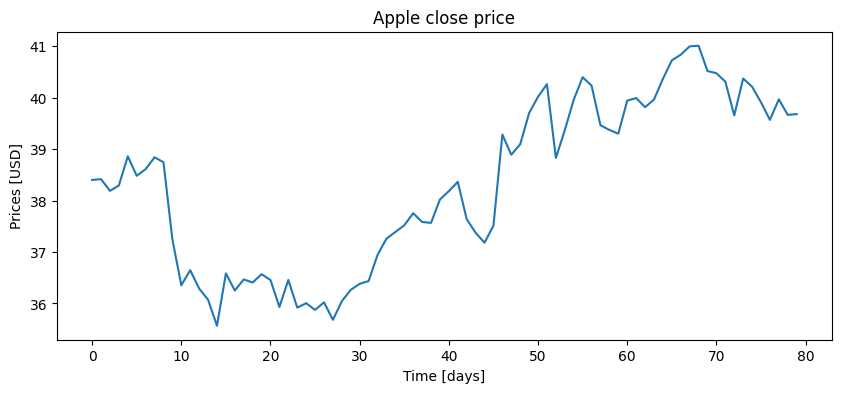

In [2]:
apple_close = stock.create_single_series(SeriesColumn.CLOSE.value)
stock.plot_single_series(apple_close, SeriesColumn.CLOSE)

### Noised data and its quality

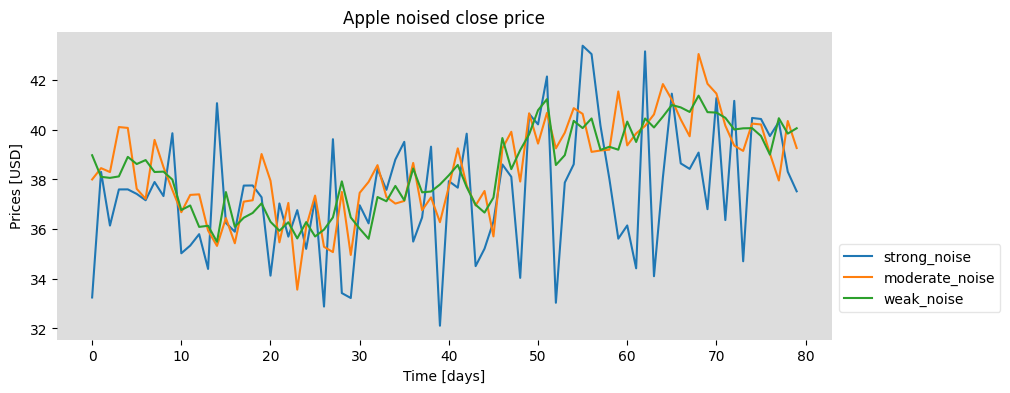

In [3]:
stock.plot_multiple_series("noised close price",
                           strong_noise=stock.all_series_noised[Strength.STRONG][SeriesColumn.CLOSE],
                           moderate_noise=stock.all_series_noised[Strength.MODERATE][SeriesColumn.CLOSE],
                           weak_noise=stock.all_series_noised[Strength.WEAK][SeriesColumn.CLOSE])

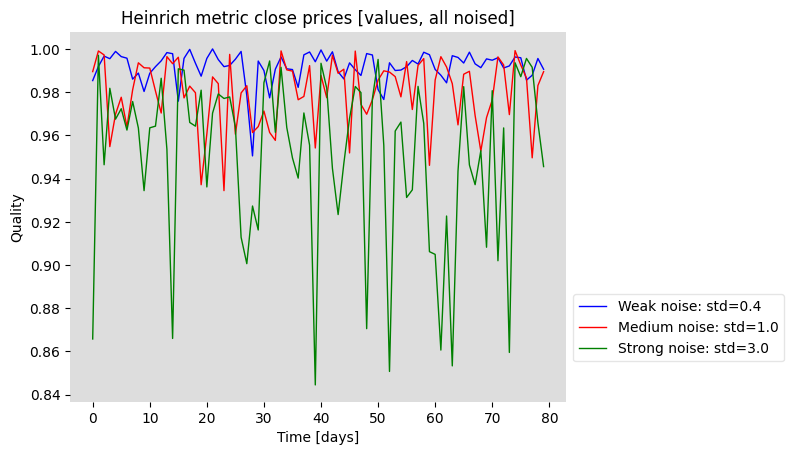

In [4]:
from metrics.correctness import HeinrichCorrectnessMetric

heinrich = HeinrichCorrectnessMetric(stock,
                                     alpha={SeriesColumn.OPEN: 1.6,
                                            SeriesColumn.CLOSE: 2.1,
                                            SeriesColumn.ADJ_CLOSE: 1.7,
                                            SeriesColumn.HIGH: 2.0,
                                            SeriesColumn.LOW: 2.3,
                                            SeriesColumn.VOLUME: 3.1})

weak, moderate, strong = heinrich.values_qualities(SeriesColumn.CLOSE, is_alpha=False)
heinrich.draw_heinrich_qualities(weak, moderate, strong, MetricLevel.VALUES, is_alpha=False,
                                 column_name=SeriesColumn.CLOSE)

## Statistical methods

In [5]:
from arima import ManualArima, AutoArima

arima_type = ManualArima

## AR(5)

In [6]:
arima = PredictionModel(stock, arima_type, prediction_start,
                   DefectionRange.ALL, DefectsSource.NOISE, SeriesColumn.CLOSE, iterations=iterations, p=5, q=0)

### Example

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is ava

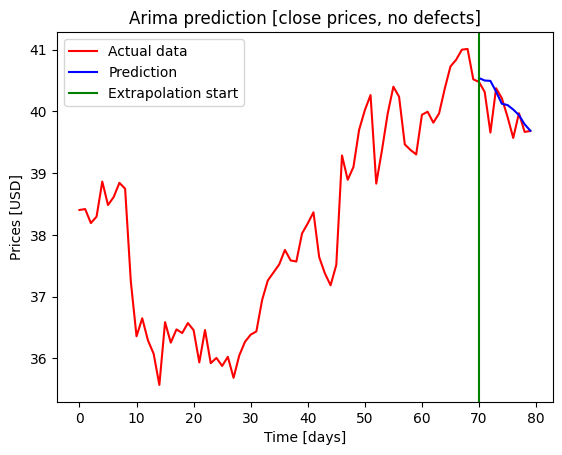

RMS: 0.318 


In [7]:
arima.present_prediction()

### Statistics

In [8]:
arima.compute_statistics()

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is ava

Statistics of SeriesColumn.CLOSE in Apple with 3 iterations:
  Defects scale Avg elapsed time [ms] Std dev elapsed time Avg RMS Std dev RMS
0          none            328.333333             8.962886   0.318         0.0
1          weak                   288             4.358899    0.97         0.0
2      moderate                   231                  4.0   2.004         0.0
3        strong            370.666667            15.947832   2.605         0.0


## ARIMA(5,1,5)

In [9]:
arima = PredictionModel(stock, arima_type, prediction_start,
                   DefectionRange.ALL, DefectsSource.NOISE, SeriesColumn.CLOSE, iterations=iterations, p=5, q=2)

### Example

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

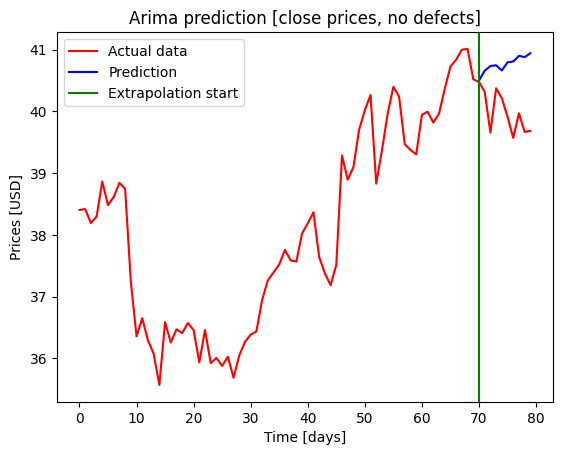

RMS: 0.886 


In [10]:
arima.present_prediction()

### Statistics

In [11]:
arima.compute_statistics()

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

Statistics of SeriesColumn.CLOSE in Apple with 3 iterations:
  Defects scale Avg elapsed time [ms] Std dev elapsed time Avg RMS Std dev RMS
0          none                  1427            20.663978   0.886         0.0
1          weak                  1409            22.338308   0.844         0.0
2      moderate                  1182             8.185353   2.013         0.0
3        strong            859.333333             4.041452    2.62         0.0


C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Maciek\Desktop\Magisterka\project\predictions\arima.py:83: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_with_prediction = data_with_prediction.append(prediction_series)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no asso

## Reservoir computing

In [12]:
from predictions.reservoir import Reservoir

reservoir = PredictionModel(stock, Reservoir, prediction_start,
                       DefectionRange.ALL, DefectsSource.NOISE, SeriesColumn.CLOSE, iterations=iterations)

### Example

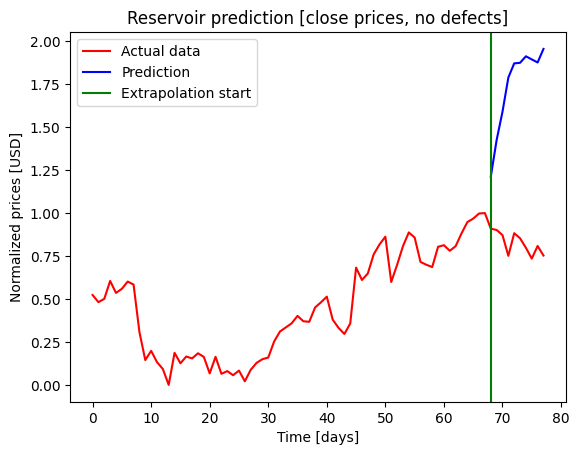

RMS: 1.709 


In [13]:
reservoir.present_prediction()

### Statistics

In [14]:
reservoir.compute_statistics()

Statistics of SeriesColumn.CLOSE in Apple with 3 iterations:
  Defects scale Avg elapsed time [ms] Std dev elapsed time   Avg RMS  \
0          none              8.666667              0.57735  0.249667   
1          weak              8.333333             1.527525  0.336333   
2      moderate                     8                  0.0  0.498333   
3        strong                     8                  0.0     0.323   

  Std dev RMS  
0    0.055806  
1     0.30723  
2    0.322215  
3    0.056205  


C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(


In [15]:
## More data

In [16]:
time_series_start = 0
time_series_end = 300
prediction_start = 250

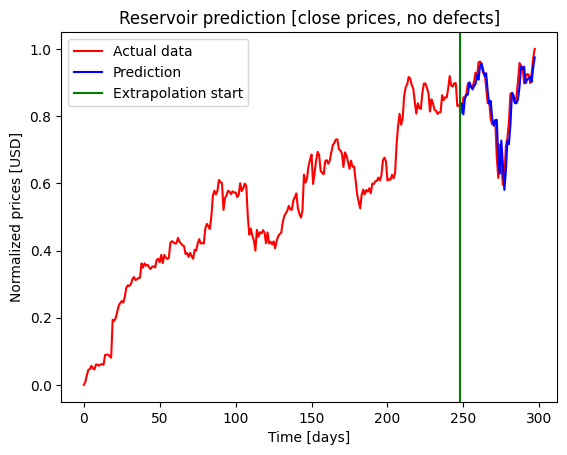

RMS: 0.095 


In [17]:
stock = StockMarketSeries("Apple", "../data/apple.csv", time_series_start, time_series_end)
reservoir = PredictionModel(stock, Reservoir, prediction_start,
                       DefectionRange.ALL, DefectsSource.NOISE, SeriesColumn.CLOSE, iterations=iterations)
reservoir.present_prediction()